In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
melluso = pd.read_csv("./melluso_clean.csv")
duelune = pd.read_csv("./duelune_clean.csv")

In [5]:
confronto = pd.concat([melluso , duelune]).reset_index(drop=True)
confronto

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
0,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0,0.0,Melluso
1,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,149.90,149.9,0.0,Melluso
2,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.0,Melluso
3,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.0,Melluso
4,Décolleté donna in camoscio zebra cioccolato d...,d5176w,donna,decollete,decollete,cioccolato,111.93,159.9,30.0,Melluso
...,...,...,...,...,...,...,...,...,...,...
1392,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,sandalo,Bianco,40.00,59.9,33.0,Duelune
1393,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,sandalo,Cuoio,45.00,59.9,25.0,Duelune
1394,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,sandalo,Nero,45.00,59.9,25.0,Duelune
1395,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,sandalo,Grigio,45.00,59.9,25.0,Duelune


In [7]:
confronto.shape

(1397, 10)

In [9]:
confronto[confronto.Prezzo_originale.isna() == True]

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
301,Mocassino donna in pelle nero x5327w,x5327w,donna,mocassini,mocassino,nero,NaN,NaN,NaN,Melluso
346,Tronchetto donna in camoscio bordo l5331w,l5331w,donna,stivaletti,tronchetto,bordo,NaN,NaN,NaN,Melluso
351,Tronchetto donna in pelle blu navy r35600w,r35600w,donna,stivaletti,tronchetto,navy,NaN,NaN,NaN,Melluso
548,Mocassino donna in pelle nero x5327w,x5327w,donna,tacchi-comodi,mocassino,nero,NaN,NaN,NaN,Melluso
694,Tronchetto donna in pelle blu navy r35600w,r35600w,donna,tacchi-comodi,tronchetto,navy,NaN,NaN,NaN,Melluso


In [13]:
#I remove shoes with no price
confronto = confronto.dropna(subset="Prezzo_originale")

In [15]:
confronto.Prezzo_originale.isna().sum()

0

In [17]:
confronto

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
0,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0,0.0,Melluso
1,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,149.90,149.9,0.0,Melluso
2,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.0,Melluso
3,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.0,Melluso
4,Décolleté donna in camoscio zebra cioccolato d...,d5176w,donna,decollete,decollete,cioccolato,111.93,159.9,30.0,Melluso
...,...,...,...,...,...,...,...,...,...,...
1392,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,sandalo,Bianco,40.00,59.9,33.0,Duelune
1393,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,sandalo,Cuoio,45.00,59.9,25.0,Duelune
1394,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,sandalo,Nero,45.00,59.9,25.0,Duelune
1395,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,sandalo,Grigio,45.00,59.9,25.0,Duelune


# ANALYSIS:

# 1) Categories and Subcategories

In [22]:
confronto.groupby("Azienda")["Azienda"].agg(Total_Products=("count"))

,Total_Products
Azienda,
Duelune,403
Melluso,989


Text(0, 0.5, 'Total Products')

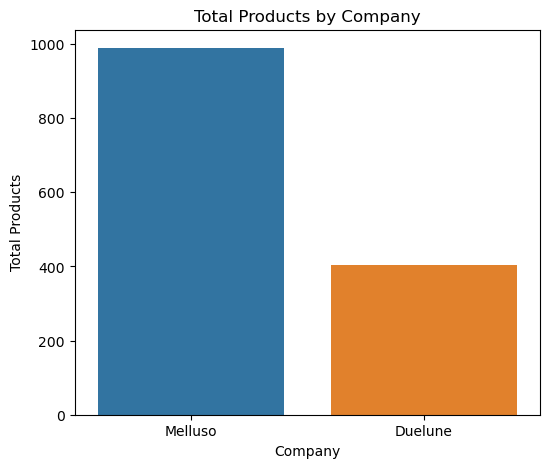

In [26]:
plt.figure(figsize=(6, 5))

sns.countplot(data=confronto , x="Azienda", hue="Azienda")
plt.title('Total Products by Company')
plt.xlabel("Company")
plt.ylabel("Total Products")

In [29]:
confronto.groupby(['Azienda','Categoria'],dropna=False)["Azienda"].agg(Total_Products=("count"))

Total_Products
Azienda Categoria                       
Duelune ballerine                     31
        decollete                     73
        doppia-fibbia                  4
        goodyear-welted                3
        mocassini-slipon              27
        polacchine                     8
        sandali                       51
        scarpe-basse                  25
        sneakers                     103
        stivaletti                    22
        stivali                       39
        stringate                     17
Melluso cerimonia                     66
        classiche                     30
        decollete                    184
        mocassini                    136
        pantofole                     28
        sneakers                      77
        stivaletti                    94
        stivali                       15
        tacchi-alti                   85
        tacchi-comodi                262
        NaN                           12

* There are 12 products with null category. During web scraping I assigned NaN to category of Melluso Gift Card.
* Only Melluso offers Gift Cards. Specifically, the Gift Cards are offered 12 times throughout the website.
* For the sake of this analysis, we remove the Gift Cards from the dataframe.

In [35]:
confronto = confronto.dropna(subset="Categoria")

In [37]:
confronto.groupby(['Azienda','Categoria'], dropna=False)["Azienda"].agg(Total_Products=("count"))

Total_Products
Azienda Categoria                       
Duelune ballerine                     31
        decollete                     73
        doppia-fibbia                  4
        goodyear-welted                3
        mocassini-slipon              27
        polacchine                     8
        sandali                       51
        scarpe-basse                  25
        sneakers                     103
        stivaletti                    22
        stivali                       39
        stringate                     17
Melluso cerimonia                     66
        classiche                     30
        decollete                    184
        mocassini                    136
        pantofole                     28
        sneakers                      77
        stivaletti                    94
        stivali                       15
        tacchi-alti                   85
        tacchi-comodi                262

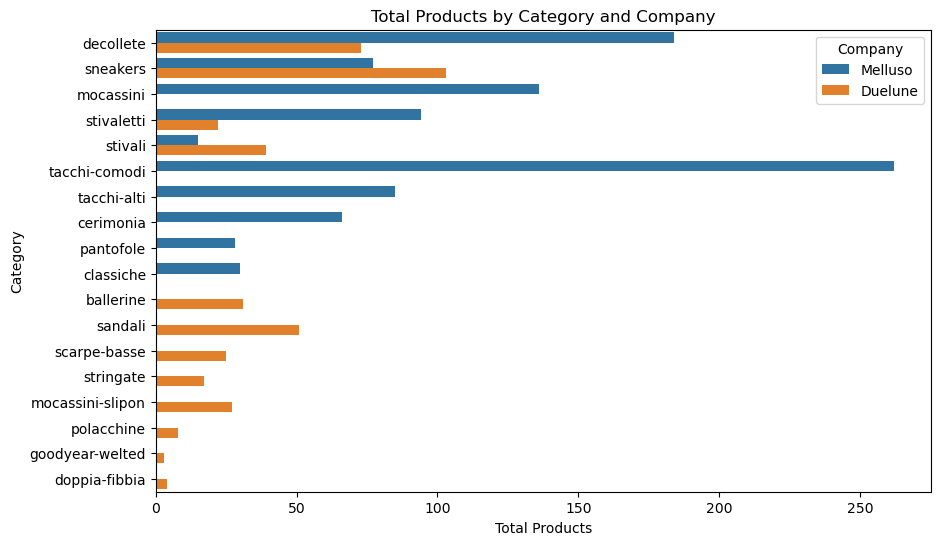

In [39]:
plt.figure(figsize=(10, 6))

sns.countplot(data=confronto , y="Categoria", hue="Azienda")
plt.title('Total Products by Category and Company')
plt.xlabel("Total Products")
plt.ylabel("Category")
plt.legend(title='Company')

* Most category names are different for the two companies. It is possible to reconciliate this discrepancy by renaming the categories or by looking at the sub categories. The sub category is the first word of the saved description (column "Info").

In [42]:
confronto.groupby(['Azienda','Sotto_categoria'])["Azienda"].agg(Total_Products="count")

Total_Products
Azienda Sotto_categoria                
Duelune ballerina                    33
        decollete                    38
        doppia                        4
        espadrilla                    4
        mocassino                    41
        sandalo                      79
        scarponcino                   5
        slingback                     7
        sneaker                       2
        sneakers                    104
        stivale                      37
        stivaletto                   27
        stringata                    22
Melluso borsa                         7
        decollete                   383
        mocassino                   217
        pantofola                    50
        sandalo                       3
        scarpa                       31
        sneakers                    118
        stivale                      19
        stivaletto                  104
        tronchetto                   45

In [44]:
confronto.loc[confronto.Sotto_categoria == "scarpa","Info"]

602           Scarpa uomo stringata in pelle moro u0563w
603           Scarpa uomo stringata in pelle nero u0563w
881    Scarpa uomo allacciata derby in pelle abrasiva...
886    Scarpa uomo allacciata derby in pelle abrasiva...
919    Scarpa derby uomo allacciata in pelle abrasiva...
920    Scarpa stringata classica uomo in pelle nero u...
921    Scarpa stringata uomo derby in pelle abrasivat...
922    Scarpa stringata uomo derby in pelle abrasivat...
923    Scarpa stringata uomo derby in pelle vitello n...
924    Scarpa stringata uomo francesina in pelle abra...
925    Scarpa stringata uomo francesina in pelle abra...
926    Scarpa stringata uomo francesina in pelle nero...
927    Scarpa stringata uomo francesina in pelle vite...
928    Scarpa stringata uomo francesina in pelle vite...
929    Scarpa uomo stringata classica in pelle marron...
930    Scarpa uomo stringata classica in pelle nero u...
931    Scarpa uomo stringata classica in pelle nero u...
932    Scarpa uomo stringata de

In [46]:
confronto.loc[confronto.Sotto_categoria == "slingback","Info"]

1075        Slingback con tacco A3683 Nero
1079     Slingback con tacco A3683 Argento
1080       Slingback con tacco A3683 Panna
1195                 Slingback A5730 Cuoio
1196                  Slingback A5730 Nero
1199          Slingback A3665 Camoscio Blu
1200    Slingback A3665 Spazzolato Argento
Name: Info, dtype: object

In [48]:
confronto.loc[confronto.Sotto_categoria == "doppia","Info"]

1239      Doppia Fibbia D169 Nabuck Marrone
1240                Doppia Fibbia D169 Nero
1390              Doppia Fibbia AARON Cuoio
1391    Doppia Fibbia AARON Abrasivato Nero
Name: Info, dtype: object

In [50]:
confronto.loc[confronto.Sotto_categoria == "borsa","Info"]

789       Borsa pochette con tracolla laminato oro bj057
793     Borsa pochette con tracolla in pelle nero bj034z
794     Borsa pochette con tracolla in pelle nero bj036z
834     Borsa pochette con tracolla in pelle nude bj034z
835    Borsa pochette con tracolla in pelle cipria bj...
853    Borsa pochette con tracolla in tessuto raso ne...
854    Borsa pochette con tracolla in pelle nappetta ...
Name: Info, dtype: object

* "scarpa" for Melluso corresponds to "stringata" for Duelune.
* there are a couple of "sneaker" for Duelune that can be renamed "sneakers".
* "doppia" stands for "Doppia Fibbia".
* subcategory "borsa" (bag) can be removed.

In [53]:
confronto = confronto.drop(confronto[confronto.Sotto_categoria == "borsa"].index)

In [55]:
confronto["Sotto_categoria"] = confronto["Sotto_categoria"].replace("scarpa","stringata")
confronto["Sotto_categoria"] = confronto["Sotto_categoria"].replace("sneaker","sneakers")
confronto["Sotto_categoria"] = confronto["Sotto_categoria"].replace("doppia","doppia_fibbia")

In [57]:
confronto

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
1,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,149.90,149.9,0.000000,Melluso
2,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.000000,Melluso
3,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.000000,Melluso
4,Décolleté donna in camoscio zebra cioccolato d...,d5176w,donna,decollete,decollete,cioccolato,111.93,159.9,30.000000,Melluso
5,Décolleté donna in camoscio vino d5178w,d5178w,donna,decollete,decollete,vino,73.45,149.9,51.000667,Melluso
...,...,...,...,...,...,...,...,...,...,...
1392,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,sandalo,Bianco,40.00,59.9,33.000000,Duelune
1393,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,sandalo,Cuoio,45.00,59.9,25.000000,Duelune
1394,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,sandalo,Nero,45.00,59.9,25.000000,Duelune
1395,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,sandalo,Grigio,45.00,59.9,25.000000,Duelune


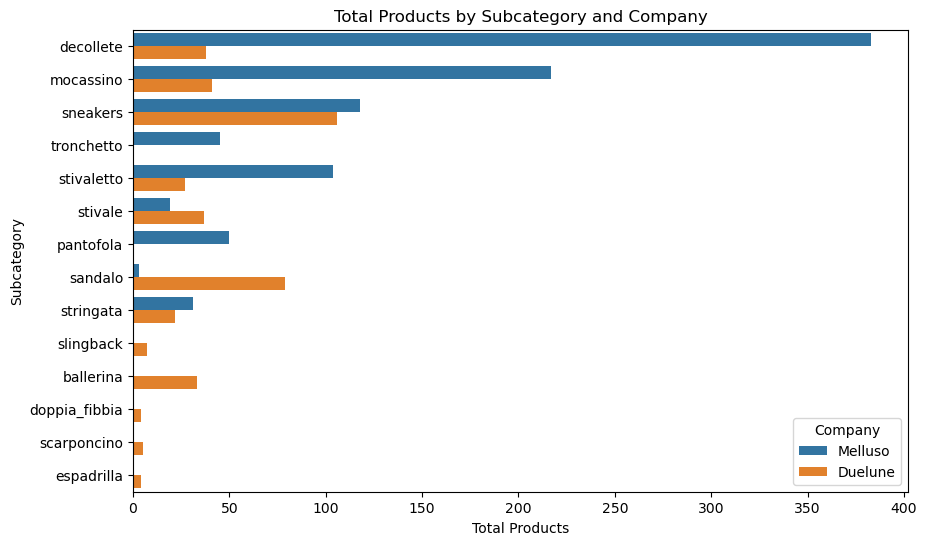

In [59]:
plt.figure(figsize=(10, 6))

sns.countplot(data=confronto , y="Sotto_categoria", hue="Azienda")
plt.title('Total Products by Subcategory and Company')
plt.xlabel("Total Products")
plt.ylabel("Subcategory")
plt.legend(title='Company')

* Category and subcategory now refer the same thing: type of shoe
* Melluso focuses on a few types (category) of shoes but offers a wide range of models for each category (especially decollete).
* DueLune offers more types (categories) of shoes, but a few models for each category.

# 2) Prices

In [64]:
confronto.groupby('Azienda').Prezzo_finale.agg(Mean_Final_Price = ('mean'))

,Mean_Final_Price
Azienda,
Duelune,82.178288
Melluso,114.010629


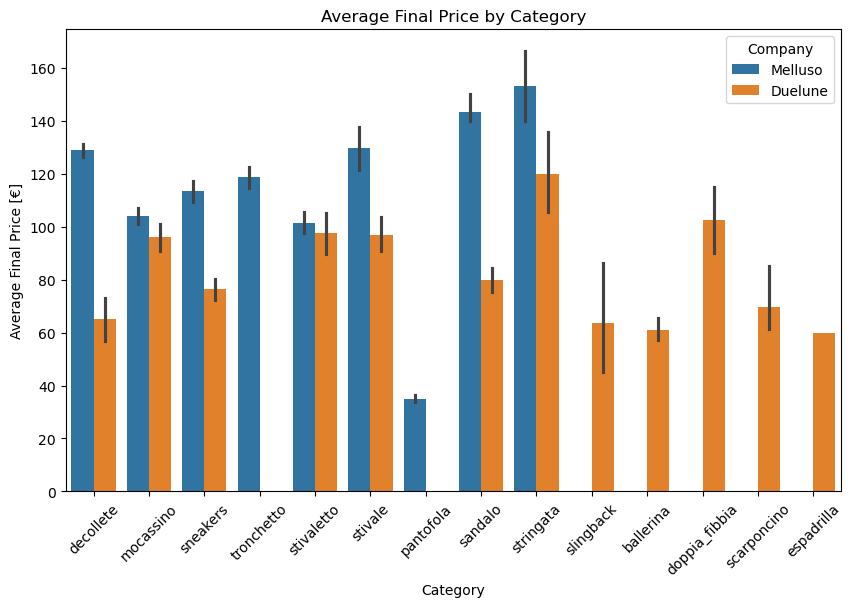

In [66]:
plt.figure(figsize=(10, 6))

sns.barplot(data=confronto , x="Sotto_categoria", y="Prezzo_finale", estimator="mean", hue="Azienda")
plt.title('Average Final Price by Category')
plt.xlabel("Category")
plt.ylabel("Average Final Price [€]")
plt.legend(title="Company")
plt.xticks(rotation=45)
plt.show()

In [68]:
confronto.groupby('Azienda').Prezzo_originale.agg(Mean_Original_Price = ('mean'))

,Mean_Original_Price
Azienda,
Duelune,95.389578
Melluso,143.470722


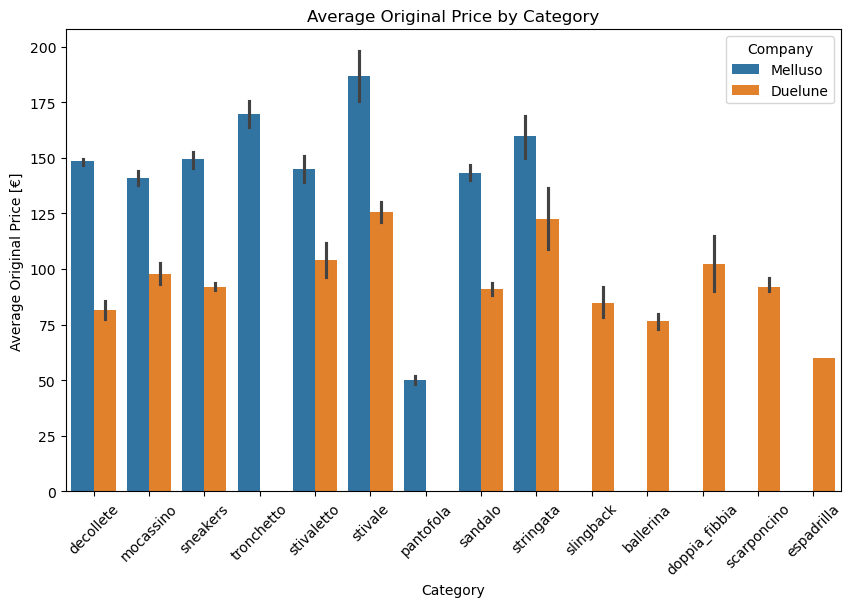

In [70]:
plt.figure(figsize=(10, 6))

sns.barplot(data=confronto , x="Sotto_categoria", y="Prezzo_originale", estimator="mean", hue="Azienda")
plt.title('Average Original Price by Category')
plt.xlabel("Category")
plt.ylabel("Average Original Price [€]")
plt.legend(title="Company")
plt.xticks(rotation=45)
plt.show()

In [72]:
confronto.groupby('Azienda').Sconto.agg(Mean_Discount=('mean')).round(2)

,Mean_Discount
Azienda,
Duelune,14.44
Melluso,20.99


* Melluso has higher prices but also offers higher discounts (this analysis is limited to shoes available on the websites in Febrary 2025).

Text(0.5, 1.0, 'Box Plot of Final Price by Company')

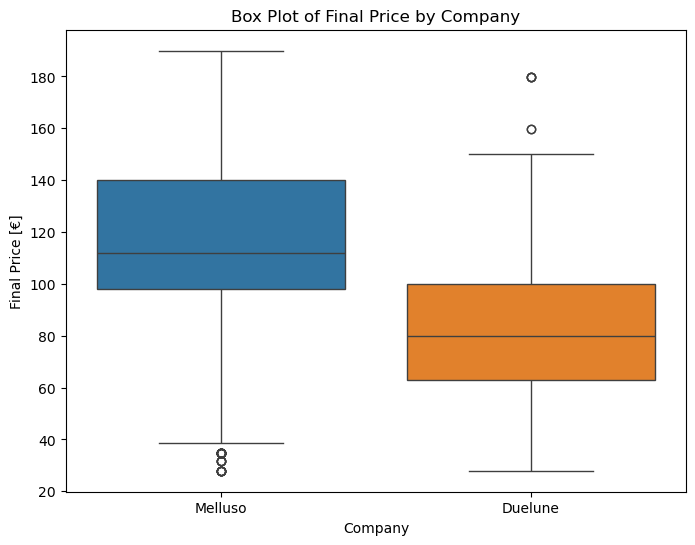

In [76]:
#Let's look at the distribution of final prices
plt.figure(figsize=(8, 6))

sns.boxplot(data=confronto, x="Azienda", y="Prezzo_finale", hue="Azienda")
plt.xlabel("Company")
plt.ylabel("Final Price [€]")
plt.title("Box Plot of Final Price by Company")

* The median value of Final Price is higher for Melluso.
* Melluso also offers a wider range of prices but most prices (inerval between the first and third quartiles) are higher than Duelune's prices.

# 3) Sex 

In [81]:
result = confronto.groupby(['Azienda', 'Sesso'])["Azienda"].agg(Product_Count=('count'))

In [83]:
total_per_company = result.groupby(level=0)['Product_Count'].transform('sum')

In [85]:
result['Percentage_of_Total'] = ((result['Product_Count'] / total_per_company) * 100).round(2)

In [87]:
result

Product_Count  Percentage_of_Total
Azienda Sesso                                    
Duelune donna            268                66.50
        uomo             135                33.50
Melluso donna            860                88.66
        uomo             110                11.34

* Both companies focus mostly on shoes for women.
* The percentage of shoes for women is higher for Melluso than for Duelune.

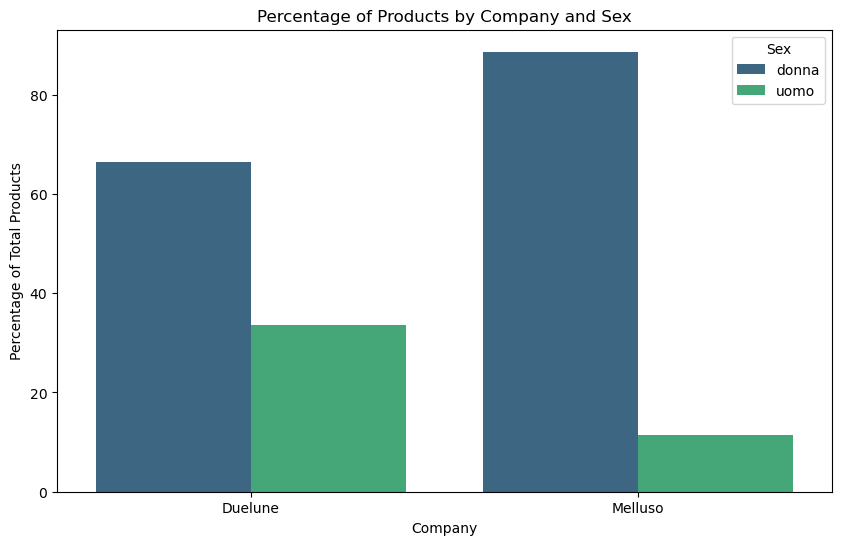

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(data=result, x='Azienda', y='Percentage_of_Total', hue='Sesso', palette='viridis')

plt.title('Percentage of Products by Company and Sex')
plt.xlabel('Company')
plt.ylabel('Percentage of Total Products')
plt.legend(title='Sex')
plt.show()